In [1]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score

from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import statsmodels as sms
import statsmodels.formula.api as smf
from scipy import stats

In [2]:
DATA_FOLDER = '/Users/mengqi/Documents/Dacheng Xiu/mispricing/code/'
data = pd.read_csv(f'{DATA_FOLDER}/lagged_comp-fundr-ibes_for_val_1976-2019.csv', index_col = 0)

In [3]:
data = data.replace([np.inf, -np.inf], np.nan)
# train val split: 1979-2009 train, 2010-2019 test
tr = data.loc[(1979 <= data['year']) & (data['year'] <= 2009)]
ts = data.loc[(2010 <= data['year']) & (data['year'] <= 2019)]
tr2 = tr.dropna(subset = ['ni_2'])
ts2 = ts.dropna(subset = ['ni_2'])

X_tr2 = tr2.drop(['ticker', 'exchcd', 'permno','jdate','year','ni_1', 'ni_2', 'ni_3','ni_4','ni_5'], axis = 1)
X_ts2 = ts2.drop(['ticker', 'exchcd', 'permno','jdate','year','ni_1', 'ni_2', 'ni_3','ni_4','ni_5'], axis = 1)
y_tr2 = tr2['ni_2']
y_ts2 = ts2['ni_2']

X_tr2 = X_tr2.fillna(0).astype(float)
X_ts2 = X_ts2.fillna(0).astype(float)

y_tr2 = y_tr2.astype(float)
y_ts2 = y_ts2.astype(float)

print(X_tr2.shape, X_ts2.shape, y_tr2.shape, y_ts2.shape)

(157984, 301) (39089, 301) (157984,) (39089,)


In [4]:
for i in range(2, 7):
    pls = PLSRegression(n_components = i, )
    pls_out = pls.fit(X_tr2, y_tr2)
    yhat_tr2 = pls_out.predict(X_tr2)
    yhat_ts2 = pls_out.predict(X_ts2)
    inr2 = r2_score(y_tr2, yhat_tr2)
    outr2 = r2_score(y_ts2, yhat_ts2)
    print(i, inr2, outr2)

2 0.35592843153095166 0.5006761344581003
3 0.3735143823913327 0.5026094023874653
4 0.39084616938668704 0.5644977220437333
5 0.4045240141995903 0.4988983012924122
6 0.40875345613839165 0.4750140490679018


In [5]:
import pickle
pls2 = PLSRegression(n_components = 4)
pls2_out = pls2.fit(X_tr2, y_tr2)
with open('PLS_regr2_ncomp4.pickle','wb') as handle:
          pickle.dump(pls2, handle, protocol=pickle.HIGHEST_PROTOCOL)
yhat_tr2 = pls2_out.predict(X_tr2)
yhat_ts2 = pls2_out.predict(X_ts2)

<AxesSubplot:>

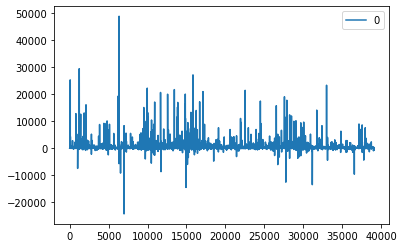

In [6]:
pd.DataFrame(yhat_ts2).plot()

<AxesSubplot:>

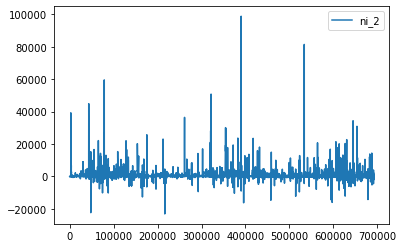

In [7]:
pd.DataFrame(y_ts2).plot()

In [8]:
# def median_absolute_percentage_error(y_true, y_pred): 
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.median(np.abs((y_true - y_pred) / y_true)) 

# def median_percentage_error(y_true, y_pred): 
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.median((-(y_true - y_pred) / y_true)) 

# pls1_in_mdape = median_absolute_percentage_error(y_tr1, yhat_tr1[:,0])
# pls1_out_mdape = median_absolute_percentage_error(y_ts1, yhat_ts1[:,0])
# pls1_in_mdpe = median_percentage_error(y_tr1, yhat_tr1[:,0])
# pls1_out_mdpe = median_percentage_error(y_ts1, yhat_ts1[:,0])
# print(pls1_in_mdape, pls1_out_mdape, pls1_in_mdpe, pls1_out_mdpe)

In [9]:
pls2_out.coef_
pls2_out.coef_.shape

(301, 1)

In [10]:
X_tr2_m = X_tr2.mean()
X_tr2_m

count            12.775041
shrout        46594.158276
sic2           4717.639153
sic            4717.639153
siccd          4545.386862
                  ...     
mean_pre_5       15.758359
std_pre_5         0.788495
med_ebt_5        15.527876
mean_ebt_5       15.548231
std_ebt_5         0.459537
Length: 301, dtype: float64

In [11]:
X_tr2_std = X_tr2.std()
X_tr2_std

count             11.014666
shrout        224879.305280
sic2            1980.432250
sic             1980.432250
siccd           2083.249237
                  ...      
mean_pre_5       389.243087
std_pre_5         27.930710
med_ebt_5        458.100261
mean_ebt_5       458.378481
std_ebt_5         23.217456
Length: 301, dtype: float64

In [12]:
pls2_varimp = pls2_out.coef_[:,0] * X_tr2_std
pls2_varimp.shape
pls2_varimp.keys()

Index(['count', 'shrout', 'sic2', 'sic', 'siccd', 'naics', 'act', 'ceq', 'che',
       'dltt',
       ...
       'std_eps_5', 'med_sal_5', 'mean_sal_5', 'std_sal_5', 'med_pre_5',
       'mean_pre_5', 'std_pre_5', 'med_ebt_5', 'mean_ebt_5', 'std_ebt_5'],
      dtype='object', length=301)

In [13]:
list(X_ts2.keys())

['count',
 'shrout',
 'sic2',
 'sic',
 'siccd',
 'naics',
 'act',
 'ceq',
 'che',
 'dltt',
 'gdwl',
 'intan',
 'lct',
 'lt',
 'ppegt',
 'ppent',
 'txdb',
 'wcap',
 'dp',
 'dvt',
 'ebit',
 'ebitda',
 'epsfx',
 'epspx',
 'gp',
 'ib',
 'ni',
 'niadj',
 'nopi',
 'opincar',
 'opiti',
 'pi',
 'revt',
 'capx',
 'aqc',
 'dv',
 'chech',
 'dpc',
 'wcapch',
 'ps_x',
 'be',
 'ni_-5',
 'at_-5',
 'epspx_-5',
 'revt_-5',
 'capx_-5',
 'naics_-5',
 'ib_-5',
 'ebitda_-5',
 'ebit_-5',
 'nopi_-5',
 'pi_-5',
 'dvt_-5',
 'be_-5',
 'ni_-4',
 'at_-4',
 'epspx_-4',
 'revt_-4',
 'capx_-4',
 'naics_-4',
 'ib_-4',
 'ebitda_-4',
 'ebit_-4',
 'nopi_-4',
 'pi_-4',
 'dvt_-4',
 'be_-4',
 'ni_-3',
 'at_-3',
 'epspx_-3',
 'revt_-3',
 'capx_-3',
 'naics_-3',
 'ib_-3',
 'ebitda_-3',
 'ebit_-3',
 'nopi_-3',
 'pi_-3',
 'dvt_-3',
 'be_-3',
 'ni_-2',
 'at_-2',
 'epspx_-2',
 'revt_-2',
 'capx_-2',
 'naics_-2',
 'ib_-2',
 'ebitda_-2',
 'ebit_-2',
 'nopi_-2',
 'pi_-2',
 'dvt_-2',
 'be_-2',
 'ni_-1',
 'at_-1',
 'epspx_-1',
 'revt

In [14]:
np.abs(pls2_varimp).argsort()[-15:][::-1]

std_ebt_5     207
mean_ebt_5    174
med_ebt_5       1
std_pre_5       5
mean_pre_5     98
med_pre_5      13
std_sal_5      42
mean_sal_5     94
med_sal_5      55
std_eps_5      85
mean_eps_5      9
med_eps_5      68
std_ebt_4      46
mean_ebt_4     32
med_ebt_4      14
dtype: int64

['ebit_-5' 'pi' 'dltt' 'std_pre_1' 'dvt' 'ib' 'pi_-1' 'ebitda_-5' 'dvt_-1'
 'ib_-1' 'std_pre_3' 'shrout' 'niadj' 'ni' 'ni_0']
['debt_ebitda' 'evm' 'shrout' 'naics' 'naics_-1' 'lt' 'at_-5' 'at_-1'
 'at_-4' 'naics_-2' 'dltt' 'at_-3' 'naics_-5' 'revt' 'ppegt']


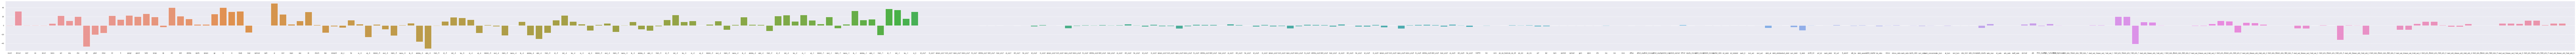

In [15]:
import seaborn as sns

print(np.asarray(list(X_ts2.keys()))[(np.abs(pls2.coef_[:,0]).argsort()[-15:][::-1])])
print(np.asarray(list(pls2_varimp.keys()))[(np.abs(pls2_varimp).argsort()[-15:][::-1])])

pls2.score(X_ts2, y_ts2)
sns.set(rc={'figure.figsize':(300,6)})
ax = sns.barplot(x=list(X_ts2.keys()), y=pls2.coef_[:,0])

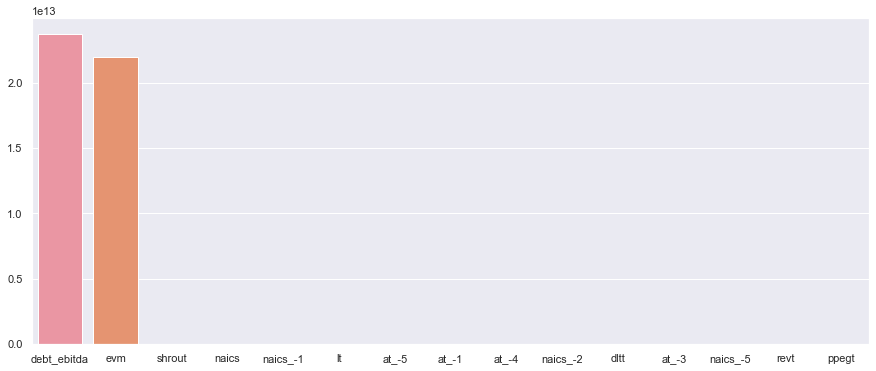

In [16]:
sns.set(rc={'figure.figsize':(15,6)})
ax1 = sns.barplot(x=np.asarray(list(pls2_varimp.keys()))[np.abs(pls2_varimp).argsort()[-15:][::-1]], 
                               y=(np.abs(pls2_varimp)[np.abs(pls2_varimp).argsort()[-15:][::-1]]))

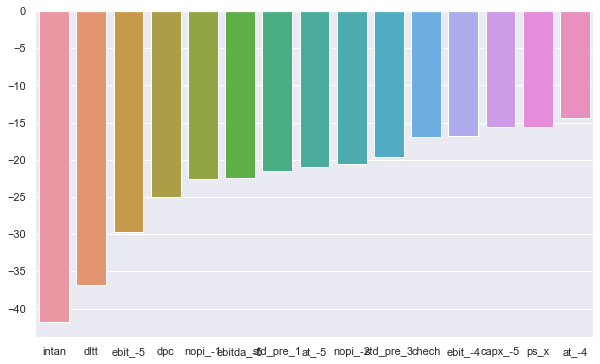

In [15]:
# ax2 = sns.barplot(x=np.asarray(list(X_ts1.keys()))[(-pls1.coef_[:,0]).argsort()[-15:][::-1]], 
#                   y=(pls1.coef_[:,0][(-pls1.coef_[:,0]).argsort()[-15:][::-1]]))

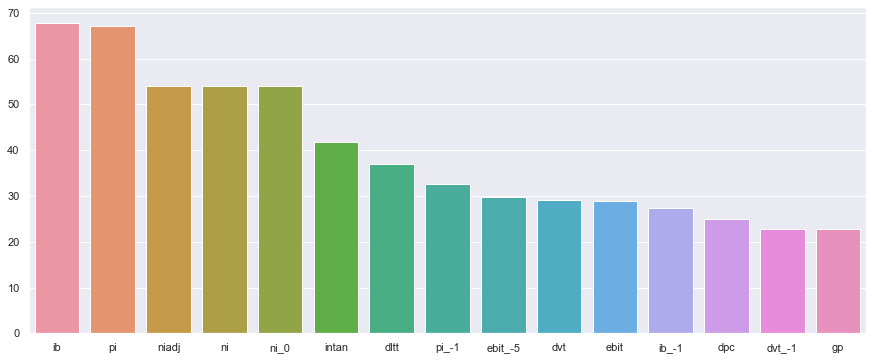

In [21]:
# ax2 = sns.barplot(x=np.asarray(list(X_ts1.keys()))[np.abs(pls1.coef_[:,0]).argsort()[-15:][::-1]], 
#                   y=(np.abs(pls1.coef_[:,0])[np.abs(pls1.coef_[:,0]).argsort()[-15:][::-1]]))

In [47]:
pct_er2 = (yhat_ts2[:,0]- y_ts2)/y_ts2
pct_er2 = pct_er2.replace([np.inf, -np.inf], np.nan)
pct_er2 = pct_er2.dropna()
print(stats.ttest_1samp(pct_er2, 0))

Ttest_1sampResult(statistic=1.1812169286945753, pvalue=0.23752374493474634)


In [17]:
tr3 = tr.dropna(subset = ['ni_3'])
ts3 = ts.dropna(subset = ['ni_3'])

X_tr3 = tr3.drop(['ticker', 'exchcd', 'permno','jdate','year','ni_1', 'ni_2', 'ni_3','ni_4','ni_5'], axis = 1)
X_ts3 = ts3.drop(['ticker', 'exchcd', 'permno','jdate','year','ni_1', 'ni_2', 'ni_3','ni_4','ni_5'], axis = 1)
y_tr3 = tr3['ni_3']
y_ts3 = ts3['ni_3']

X_tr3 = X_tr3.fillna(0).astype(float)
X_ts3 = X_ts3.fillna(0).astype(float)

y_tr3 = y_tr3.astype(float)
y_ts3 = y_ts3.astype(float)

print(X_tr3.shape, X_ts3.shape, y_tr3.shape, y_ts3.shape)

(144921, 301) (32589, 301) (144921,) (32589,)


In [49]:
for i in range(2, 7):
    pls = PLSRegression(n_components = i, )
    pls_out = pls.fit(X_tr3, y_tr3)
    yhat_tr3 = pls_out.predict(X_tr3)
    yhat_ts3 = pls_out.predict(X_ts3)
    inr2 = r2_score(y_tr3, yhat_tr3)
    outr2 = r2_score(y_ts3, yhat_ts3)
    print(i, inr2, outr2)

2 0.35713917220536495 0.4290470322971126
3 0.380624086905033 0.4232412083136269
4 0.40018627174028654 0.528815013032276
5 0.41529493323573563 0.47909413433033243
6 0.41981894404586806 0.4580408846068561


In [18]:
pls3 = PLSRegression(n_components = 4)
pls3_out = pls3.fit(X_tr3, y_tr3)
yhat_tr3 = pls3_out.predict(X_tr3)
yhat_ts3 = pls3_out.predict(X_ts3)

<AxesSubplot:>

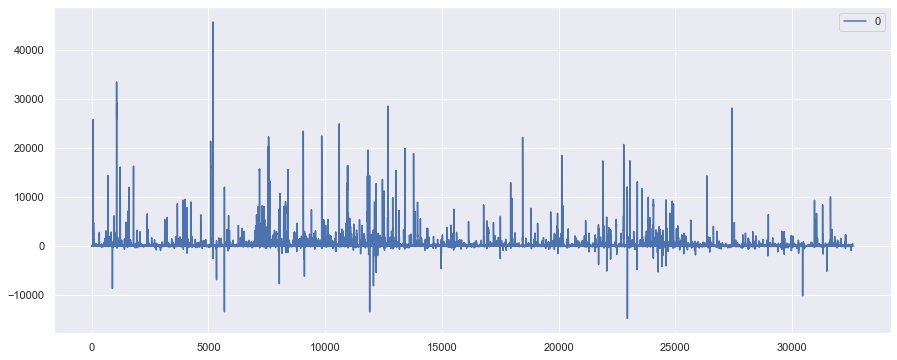

In [19]:
pd.DataFrame(yhat_ts3).plot()

<AxesSubplot:>

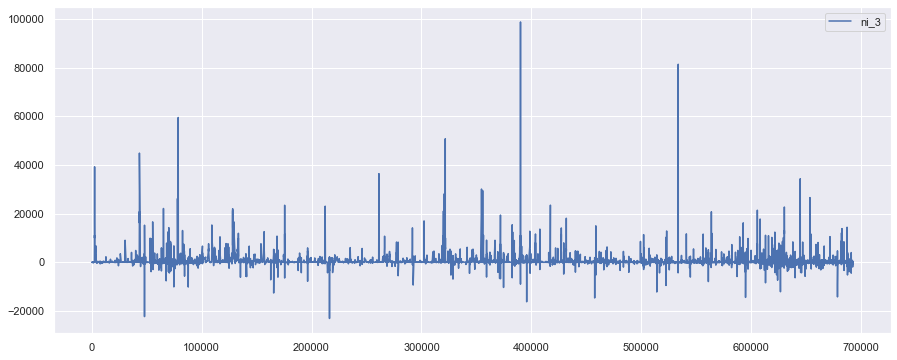

In [20]:
pd.DataFrame(y_ts3).plot()

In [21]:
X_tr3_m = X_tr3.mean()
X_tr3_std = X_tr3.std()
pls3_varimp = pls3_out.coef_[:,0] * X_tr3_std


In [22]:
print(np.asarray(list(X_ts3.keys()))[(np.abs(pls3.coef_[:,0]).argsort()[-15:][::-1])])
print(np.asarray(list(pls3_varimp.keys()))[(np.abs(pls3_varimp).argsort()[-15:][::-1])])

['ebit_-5' 'dltt' 'shrout' 'dvt' 'pi' 'ebit_-4' 'std_pre_1' 'ebitda_-5'
 'pi_-1' 'ib_-1' 'dvt_-3' 'ib' 'revt' 'dv' 'dvt_-1']
['evm' 'debt_ebitda' 'shrout' 'naics' 'naics_-1' 'lt' 'at_-4' 'dltt'
 'at_-3' 'at_-5' 'at_-1' 'revt' 'naics_-2' 'ppegt' 'revt_-1']


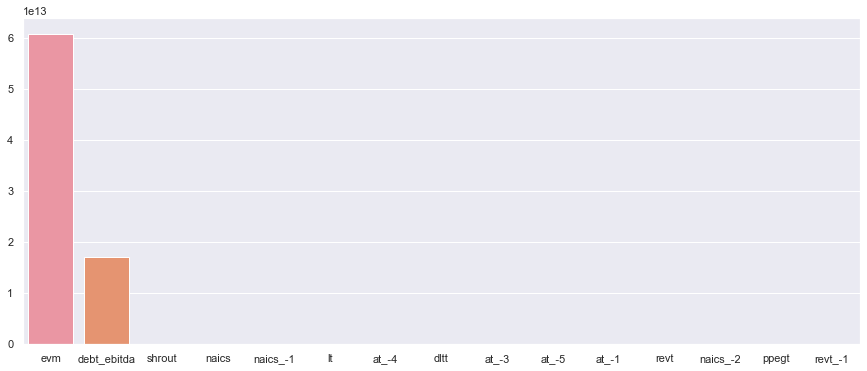

In [23]:
sns.set(rc={'figure.figsize':(15,6)})
ax1 = sns.barplot(x=np.asarray(list(pls3_varimp.keys()))[np.abs(pls3_varimp).argsort()[-15:][::-1]], 
                               y=(np.abs(pls3_varimp)[np.abs(pls3_varimp).argsort()[-15:][::-1]]))

In [24]:
tr4 = tr.dropna(subset = ['ni_4'])
ts4 = ts.dropna(subset = ['ni_4'])

X_tr4 = tr4.drop(['ticker', 'exchcd', 'permno','jdate','year','ni_1', 'ni_2', 'ni_3','ni_4','ni_5'], axis = 1)
X_ts4 = ts4.drop(['ticker', 'exchcd', 'permno','jdate','year','ni_1', 'ni_2', 'ni_3','ni_4','ni_5'], axis = 1)
y_tr4 = tr4['ni_4']
y_ts4 = ts4['ni_4']

X_tr4 = X_tr4.fillna(0).astype(float)
X_ts4 = X_ts4.fillna(0).astype(float)

y_tr4 = y_tr4.astype(float)
y_ts4 = y_ts4.astype(float)

print(X_tr4.shape, X_ts4.shape, y_tr4.shape, y_ts4.shape)

(133344, 301) (26808, 301) (133344,) (26808,)


In [60]:
for i in range(2, 7):
    pls = PLSRegression(n_components = i, )
    pls_out = pls.fit(X_tr4, y_tr4)
    yhat_tr4 = pls_out.predict(X_tr4)
    yhat_ts4 = pls_out.predict(X_ts4)
    inr2 = r2_score(y_tr4, yhat_tr4)
    outr2 = r2_score(y_ts4, yhat_ts4)
    print(i, inr2, outr2)

2 0.35409838817602457 0.3511301968268118
3 0.37801492919431 0.37329634739187656
4 0.39575717038139324 0.5033652847688641
5 0.4116114355269652 0.4764474690563675
6 0.4163271522842318 0.4597025490654193


In [25]:
pls4 = PLSRegression(n_components = 4)
pls4_out = pls4.fit(X_tr4, y_tr4)
yhat_tr4 = pls4_out.predict(X_tr4)
yhat_ts4 = pls4_out.predict(X_ts4)

<AxesSubplot:>

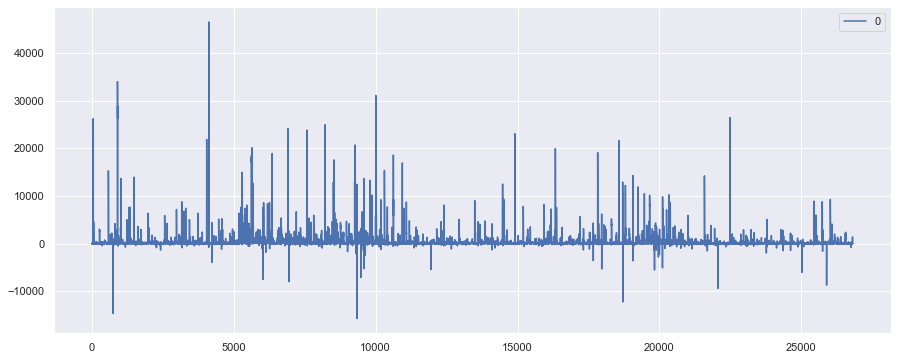

In [26]:
pd.DataFrame(yhat_ts4).plot()

<AxesSubplot:>

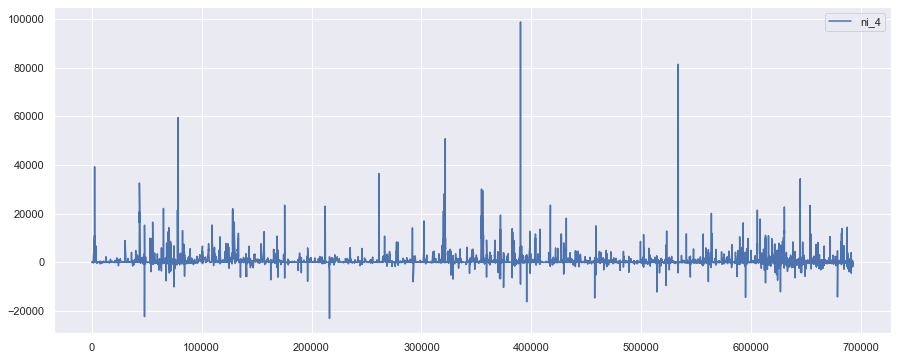

In [27]:
pd.DataFrame(y_ts4).plot()

In [28]:
X_tr4_m = X_tr4.mean()
X_tr4_std = X_tr4.std()
pls4_varimp = pls4_out.coef_[:,0] * X_tr4_std

In [29]:
print(np.asarray(list(X_ts4.keys()))[(np.abs(pls4.coef_[:,0]).argsort()[-15:][::-1])])
print(np.asarray(list(pls4_varimp.keys()))[(np.abs(pls4_varimp).argsort()[-15:][::-1])])

['dltt' 'shrout' 'pi' 'ebit_-5' 'ebit_-4' 'pi_-1' 'ib' 'dvt' 'dvt_-2'
 'dvt_-1' 'ebitda_-5' 'pi_-2' 'std_pre_1' 'ib_-1' 'ebitda_-4']
['evm' 'debt_ebitda' 'shrout' 'naics' 'naics_-1' 'dltt' 'at_-3' 'naics_-5'
 'naics_-2' 'at_-5' 'lt' 'naics_-3' 'revt' 'at_-4' 'naics_-4']


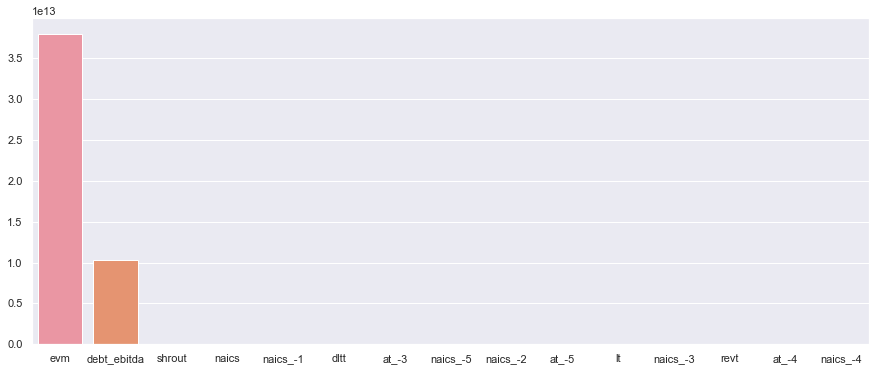

In [30]:
sns.set(rc={'figure.figsize':(15,6)})
ax1 = sns.barplot(x=np.asarray(list(pls4_varimp.keys()))[np.abs(pls4_varimp).argsort()[-15:][::-1]], 
                               y=(np.abs(pls4_varimp)[np.abs(pls4_varimp).argsort()[-15:][::-1]]))

In [31]:
tr5 = tr.dropna(subset = ['ni_5'])
ts5 = ts.dropna(subset = ['ni_5'])

X_tr5 = tr5.drop(['ticker', 'exchcd', 'permno','jdate','year','ni_1', 'ni_2', 'ni_3','ni_4','ni_5'], axis = 1)
X_ts5 = ts5.drop(['ticker', 'exchcd', 'permno','jdate','year','ni_1', 'ni_2', 'ni_3','ni_4','ni_5'], axis = 1)
y_tr5 = tr5['ni_5']
y_ts5 = ts5['ni_5']

X_tr5 = X_tr5.fillna(0).astype(float)
X_ts5 = X_ts5.fillna(0).astype(float)

y_tr5 = y_tr5.astype(float)
y_ts5 = y_ts5.astype(float)

print(X_tr5.shape, X_ts5.shape, y_tr5.shape, y_ts5.shape)

(123038, 301) (21586, 301) (123038,) (21586,)


In [68]:
for i in range(2, 7):
    pls = PLSRegression(n_components = i, )
    pls_out = pls.fit(X_tr4, y_tr4)
    yhat_tr4 = pls_out.predict(X_tr4)
    yhat_ts4 = pls_out.predict(X_ts4)
    inr2 = r2_score(y_tr4, yhat_tr4)
    outr2 = r2_score(y_ts4, yhat_ts4)
    print(i, inr2, outr2)

2 0.35409838817602457 0.3511301968268118
3 0.37801492919431 0.37329634739187656
4 0.39575717038139324 0.5033652847688641
5 0.4116114355269652 0.4764474690563675
6 0.4163271522842318 0.4597025490654193


In [32]:
pls5 = PLSRegression(n_components = 4)
pls5_out = pls5.fit(X_tr5, y_tr5)
yhat_tr5 = pls5_out.predict(X_tr5)
yhat_ts5 = pls5_out.predict(X_ts5)

<AxesSubplot:>

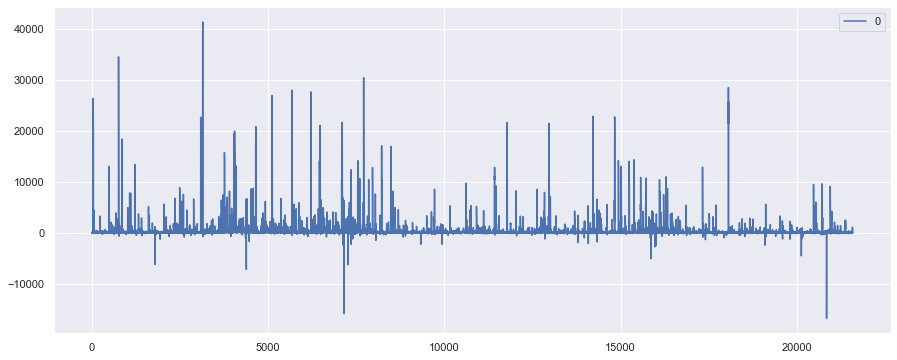

In [33]:
pd.DataFrame(yhat_ts5).plot()

<AxesSubplot:>

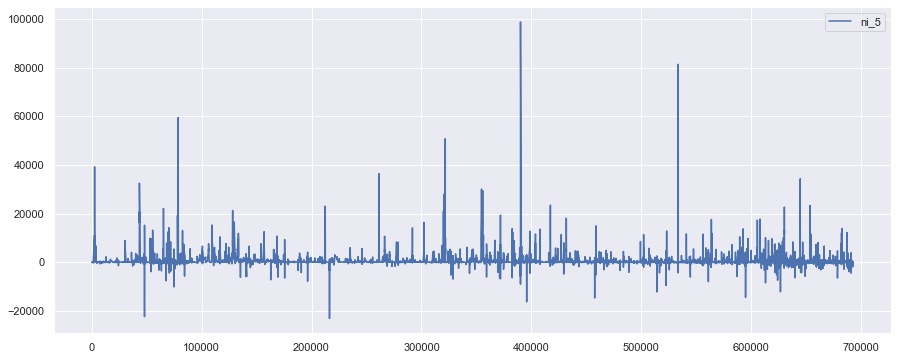

In [34]:
pd.DataFrame(y_ts5).plot()

In [35]:
X_tr5_m = X_tr5.mean()
X_tr5_std = X_tr5.std()
pls5_varimp = pls5_out.coef_[:,0] * X_tr5_std

In [36]:
print(np.asarray(list(X_ts5.keys()))[(np.abs(pls5.coef_[:,0]).argsort()[-15:][::-1])])
print(np.asarray(list(pls5_varimp.keys()))[(np.abs(pls5_varimp).argsort()[-15:][::-1])])

['dltt' 'shrout' 'pi' 'dvt' 'pi_-1' 'dvt_-1' 'ib_-1' 'ni_-1' 'dv'
 'capx_-5' 'ebit_-4' 'ib' 'be_-3' 'ceq' 'be_-2']
['evm' 'debt_ebitda' 'shrout' 'naics' 'naics_-1' 'dltt' 'naics_-2'
 'naics_-5' 'naics_-4' 'revt' 'at_-5' 'naics_-3' 'at_-4' 'ppegt' 'revt_-1']


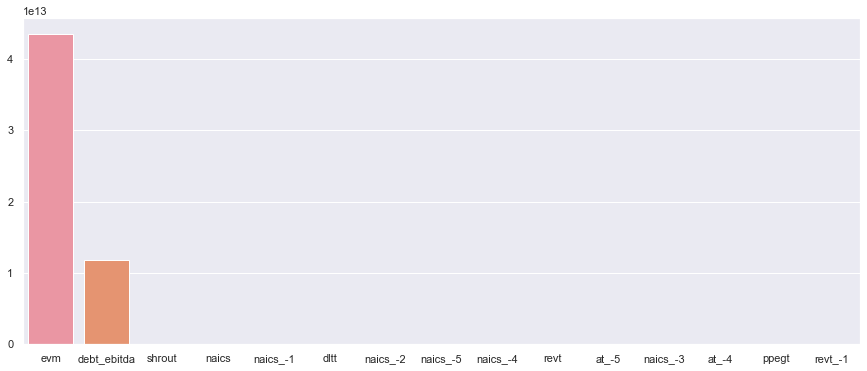

In [37]:
sns.set(rc={'figure.figsize':(15,6)})
ax1 = sns.barplot(x=np.asarray(list(pls5_varimp.keys()))[np.abs(pls5_varimp).argsort()[-15:][::-1]], 
                               y=(np.abs(pls5_varimp)[np.abs(pls5_varimp).argsort()[-15:][::-1]]))

In [38]:
tr1 = tr.dropna(subset = ['ni_1'])
ts1 = ts.dropna(subset = ['ni_1'])

X_tr1 = tr1.drop(['ticker', 'exchcd', 'permno','jdate','year','ni_1', 'ni_2', 'ni_3','ni_4','ni_5'], axis = 1)
X_ts1 = ts1.drop(['ticker', 'exchcd', 'permno','jdate','year','ni_1', 'ni_2', 'ni_3','ni_4','ni_5'], axis = 1)
y_tr1 = tr1['ni_1']
y_ts1 = ts1['ni_1']

X_tr1 = X_tr1.fillna(0).astype(float)
X_ts1 = X_ts1.fillna(0).astype(float)

y_tr1 = y_tr1.astype(float)
y_ts1 = y_ts1.astype(float)

print(X_tr1.shape, X_ts1.shape, y_tr1.shape, y_ts1.shape)

(172500, 301) (46298, 301) (172500,) (46298,)


In [39]:
pls1 = PLSRegression(n_components = 4)
pls1_out = pls1.fit(X_tr1, y_tr1)
yhat_tr1 = pls1_out.predict(X_tr1)
yhat_ts1 = pls1_out.predict(X_ts1)

In [40]:
X_tr1_m = X_tr1.mean()
X_tr1_std = X_tr1.std()
pls1_varimp = pls1_out.coef_[:,0] * X_tr1_std

In [41]:
print(np.asarray(list(X_ts1.keys()))[(np.abs(pls1.coef_[:,0]).argsort()[-15:][::-1])])
print(np.asarray(list(pls1_varimp.keys()))[(np.abs(pls1_varimp).argsort()[-15:][::-1])])

['ib' 'pi' 'niadj' 'ni' 'ni_0' 'intan' 'pi_-1' 'dltt' 'dvt' 'ebit' 'ib_-1'
 'chech' 'ebit_-5' 'dv' 'dpc']
['npm' 'ptpm' 'cfm' 'opmad' 'opmbd' 'intcov_ratio' 'intcov' 'debt_ebitda'
 'evm' 'shrout' 'naics' 'at_-1' 'at_-5' 'at_-4' 'dltt']


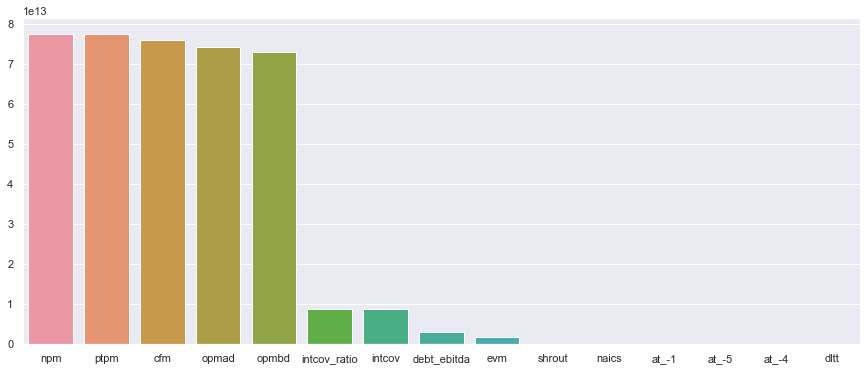

In [42]:
sns.set(rc={'figure.figsize':(15,6)})
ax1 = sns.barplot(x=np.asarray(list(pls1_varimp.keys()))[np.abs(pls1_varimp).argsort()[-15:][::-1]], 
                               y=(np.abs(pls1_varimp)[np.abs(pls1_varimp).argsort()[-15:][::-1]]))